# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.300009e+01     1.341469e+01
 * time: 0.0035059452056884766
     1     6.375579e+01     9.528811e+00
 * time: 0.010278940200805664
     2     5.641370e+01     1.293264e+01
 * time: 0.025903940200805664
     3     4.141006e+01     9.348468e+00
 * time: 0.0474390983581543
     4     3.045702e+01     8.784643e+00
 * time: 0.0682520866394043
     5     2.442681e+01     6.827502e+00
 * time: 0.08643698692321777
     6     1.176597e+01     2.543526e+00
 * time: 0.10454297065734863
     7     9.351063e+00     2.453905e+00
 * time: 0.11955714225769043
     8     7.547852e+00     2.319839e+00
 * time: 0.20436596870422363
     9     7.176747e+00     1.405579e+00
 * time: 0.22022604942321777
    10     7.072130e+00     2.599529e+00
 * time: 0.23275303840637207
    11     6.842032e+00     1.392246e+00
 * time: 0.24817395210266113
    12     6.696730e+00     1.819095e+00
 * time: 0.2605550289154053
    13     6.477478e+00     2.106370e+00
 * time

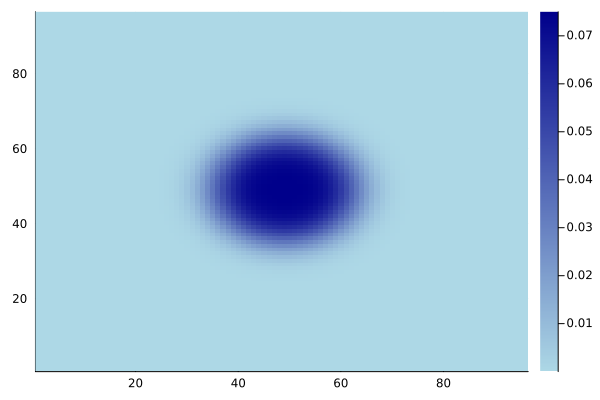

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)